In [1]:
# Acknowledgment:
# Credit to DanB (https://www.kaggle.com/dansbecker) for making the 
# original "Exercise: Deep Learning From Scratch Daily" Which I have followed and modified.

from tensorflow import keras
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.models import Model

import numpy as np

img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

fashion_file = "../input/fashionmnist/fashion-mnist_train.csv"
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')
x, y = prep_data(fashion_data)

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.exercise_7 import *
print("Setup Complete")

Using TensorFlow backend.


Setup Complete


In [2]:
def show_final_history(history):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1, 2, figsize=(16,12))

    ax[0].set_title('Loss', fontsize=12)
    ax[0].set_ylabel('Loss', fontsize=10)
    ax[0].set_xlabel('Epochs', fontsize=10)
    ax[0].plot(history.history['loss'], 'r-', label='Training Loss')
    ax[0].plot(history.history['val_loss'], 'g-', label='Validation Loss')
    ax[0].legend(loc='upper right')

    ax[1].set_title('Accuracy', fontsize=12)
    ax[1].set_ylabel('Accuracy', fontsize=10)
    ax[1].set_xlabel('Epochs', fontsize=10)
    ax[1].plot(history.history['acc'], 'r-', label='Training Accuracy')
    ax[1].plot(history.history['val_acc'], 'g-', label='Validation Accuracy')
    ax[1].legend(loc='lower right')
    
    pass


In [3]:
from tensorflow.keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=3)
datagen.fit(x)


fashion_model_two = Sequential()
fashion_model_two.add(Conv2D(20, padding="same",activation="relu",kernel_size=3,input_shape=(img_rows,img_cols,1)))
fashion_model_two.add(Dropout(0.1))
fashion_model_two.add(Conv2D(20, activation="relu", kernel_size=3))
fashion_model_two.add(Dropout(0.3))
#fashion_model_two.add(Conv2D(32, activation="relu", kernel_size=2))
#fashion_model_two.add(Conv2D(20, activation="relu", kernel_size=2))
fashion_model_two.add(Flatten())
fashion_model_two.add(Dense(110, activation="sigmoid"))
fashion_model_two.add(Dropout(0.3))
fashion_model_two.add(Dense(10, activation="softmax"))
opt = keras.optimizers.Adam(0.001)  # Setting the learning rate to 0.001 for adam algorithm
fashion_model_two.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
fashion_model_two.summary()
____

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        200       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 20)        3620      
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13520)             0         
_________________________________________________________________
dense (Dense)        

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
48000/48000 [==============================] - 4s 92us/sample - loss: 0.6453 - acc: 0.7766 - val_loss: 0.4364 - val_acc: 0.8444
Epoch 2/30
48000/48000 [==============================] - 2s 47us/sample - loss: 0.4023 - acc: 0.8602 - val_loss: 0.3437 - val_acc: 0.8789
Epoch 3/30
48000/48000 [==============================] - 2s 44us/sample - loss: 0.3439 - acc: 0.8789 - val_loss: 0.3099 - val_acc: 0.8897
Epoch 4/30
48000/48000 [==============================] - 2s 42us/sample - loss: 0.3118 - acc: 0.8889 - val_loss: 0.2857 - val_acc: 0.8967
Epoch 5/30
48000/48000 [==============================] - 2s 41us/sample - loss: 0.2811 - acc: 0.8995 - val_loss: 0.2724 - val_acc: 0.9013
Epoch 6/30
48000/48000 [==============================] - 2s 41us/sample - loss: 0.2655 - acc: 0.9059 - val_loss: 0.2678 - val_acc: 0.9016
Epoch 7/30
48000/48000 [==============================] - 2s 41us/sa

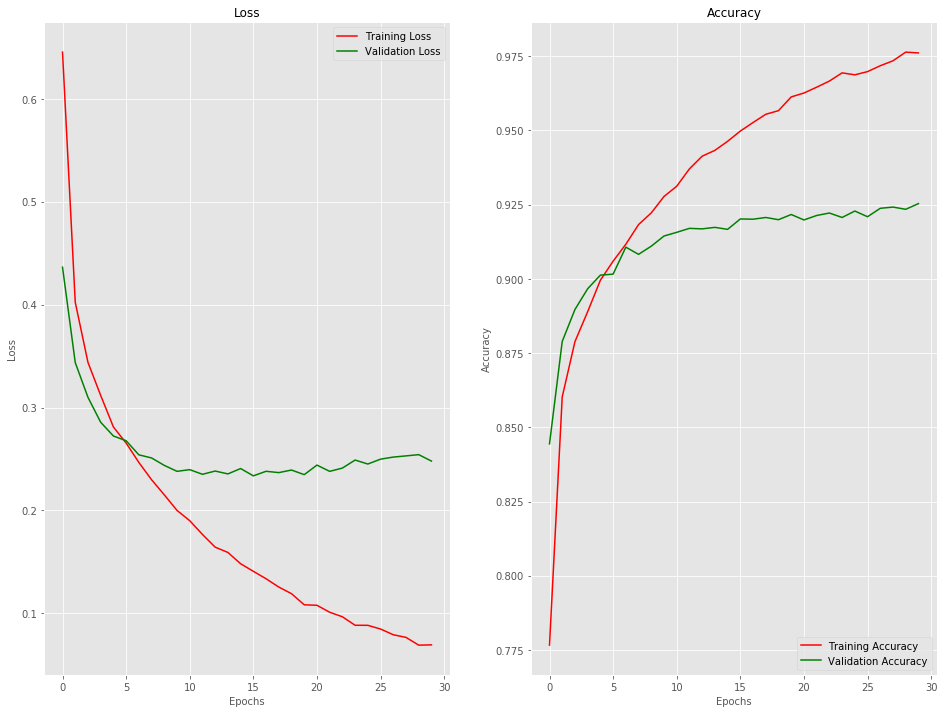

In [4]:
hist = fashion_model_two.fit(x, y, batch_size=200, epochs=30, validation_split=0.2)
show_final_history(hist)

In [5]:
#hist.history